In [ ]:
import warning
warnings.filterwarnings("ignore")

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'tf_flowers',
    split=[
      tfds.Split.TRAIN.subsplit(tfds.percent[:80]),
      tfds.Split.TRAIN.subsplit(tfds.percent[80:90]),
      tfds.Split.TRAIN.subsplit(tfds.percent[90:])
    ],
    with_info=True,
    as_supervised=True,
)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset tf_flowers downloaded and prepared to /home/aiffel0039/tensorflow_datasets/tf_flowers/1.0.0. Subsequent calls will reuse this data.


In [3]:
print(raw_train)
print(raw_validation)
print(raw_test)

<_OptionsDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<_OptionsDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<_OptionsDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
%config inlineBackend.figure_format = 'retina'

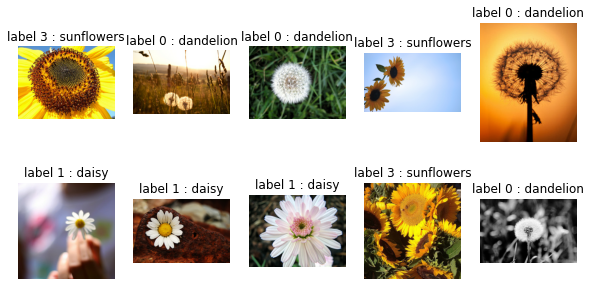

In [5]:
plt.figure(figsize=(10, 5))

get_label_name = metadata.features['label'].int2str

for idx, (image, label) in enumerate(raw_train.take(10)):
    plt.subplot(2, 5, idx+1)
    plt.imshow(image)
    plt.title("label {} : {}".format(label, get_label_name(label)))
    plt.axis('off')

In [6]:
IMG_SIZE = 160

def format_example(image, label):
    image = tf.cast(image, tf.float32)
    image = (image/127.5) - 1
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

In [8]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

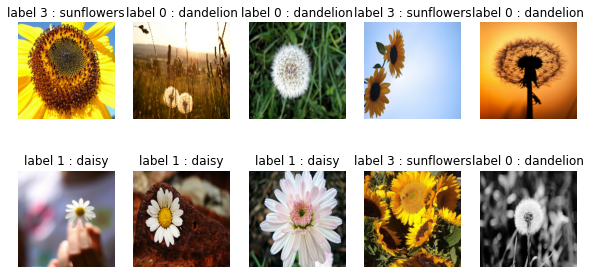

In [9]:
plt.figure(figsize = (10, 5))

for idx, (image, label) in enumerate(train.take(10)):
    plt.subplot(2, 5, idx+1)
    image = (image+1)/2
    plt.imshow(image)
    plt.title("label {} : {}".format(label, get_label_name(label)))
    plt.axis('off')

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

In [12]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(160, 160, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(units=512, activation = 'relu'))
model.add(Dense(units=2, activation = 'softmax'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 160, 160, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 80, 80, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 80, 80, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 40, 40, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 25600)            

In [14]:
base_learning_rate = 0.0001

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate),
             loss = tf.losses.sparse_categorical_crossentropy,
             metrics=['accuracy'])

In [17]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

In [18]:
train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [19]:
for image_batch, label_batch in train_batches.take(1):
    pass

image_batch.shape, label_batch.shape

(TensorShape([32, 160, 160, 3]), TensorShape([32]))